In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
from generic.latexify import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from visualization.settings import *
from visualization.helpers import *
from visualization.paperplots_20210706 import *

In [98]:
from optimize.analyze_results import *

# Load the data

In [99]:
template = 'combined_directfromoptimization3'
path = 'cached_values/outputs/organized'

In [100]:
methods = ['thiele_pav', 'thiele_independent', 'thiele_squared']

In [101]:
dfs = {method:load_organized_df(path, template, method, directfromoptimization = True) for method in methods}

In [102]:
dfs[methods[0]].head()

,state,N_districts,total_winners,optimization,N_winners_Republican,district_vote_shares,district_n_winners,district_n_winners_Republican,fraction_voters_Republican,fraction_winners_Republican
0,AL,2,7.0,subsampled,5.0,"[0.577523632049046, 0.6536182589987019]","[3.0, 4.0]","[2.0, 3.0]",0.621538,0.714286
1,AL,2,7.0,subsampled,5.0,"[0.6035623253330643, 0.6350188375702465]","[3.0, 4.0]","[2.0, 3.0]",0.621538,0.714286
2,AL,2,7.0,subsampled,5.0,"[0.5985857215047582, 0.6382106836233474]","[3.0, 4.0]","[2.0, 3.0]",0.621538,0.714286
3,AL,2,7.0,subsampled,5.0,"[0.5782642444679665, 0.6534013517327284]","[3.0, 4.0]","[2.0, 3.0]",0.621538,0.714286
4,AL,2,7.0,subsampled,5.0,"[0.578760630831505, 0.6531061575074502]","[3.0, 4.0]","[2.0, 3.0]",0.621538,0.714286


In [103]:
dfs[methods[0]].tail()

,state,N_districts,total_winners,optimization,N_winners_Republican,district_vote_shares,district_n_winners,district_n_winners_Republican,fraction_voters_Republican,fraction_winners_Republican
38,UT,1,4.0,single_district_for_state,3.0,[0.6955438144954558],[4.0],[3],0.695544,0.750000
39,VA,1,11.0,single_district_for_state,5.0,[0.46011305472360925],[11.0],[5],0.460113,0.454545
40,WA,1,10.0,single_district_for_state,4.0,[0.40777087091586245],[10.0],[4],0.407771,0.400000
41,WV,1,3.0,single_district_for_state,2.0,[0.6412395040289991],[3.0],[2],0.641240,0.666667
42,WI,1,8.0,single_district_for_state,4.0,[0.4926652977917956],[8.0],[4],0.492665,0.500000


In [104]:
# dfs[methods[0]].N_districts.unique()

In [105]:
states = dfs[methods[0]].state.unique()

In [138]:
parties = ['Republican', 'Democrat']
methods_to_plot = ['thiele_pav', 'thiele_independent', 'thiele_squared']
method_names

{'thiele_approvalindependent': 'Winner takes all',
 'thiele_independent': 'Winner takes all',
 'thiele_pav': 'STV and PAV',
 'thiele_squared': 'Thiele squared',
 'stv': 'STV'}

In [107]:
print(dfs[methods[0]].columns)

Index(['state', 'N_districts', 'total_winners', 'optimization',
       'N_winners_Republican', 'district_vote_shares', 'district_n_winners',
       'district_n_winners_Republican', 'fraction_voters_Republican',
       'fraction_winners_Republican'],
      dtype='object')


In [13]:
# STV still loading from my way
dfstvpartisan = load_organized_df(path, 'combined_partisan', 'stv')

C:\Users\Nikhil\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Nikhil\Miniconda3\lib\site-packages\pandas\core\indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Nikhil\Miniconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [14]:
dfs['stv'] = load_organized_df(path, 'combined', 'stv')

C:\Users\Nikhil\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Nikhil\Miniconda3\lib\site-packages\pandas\core\indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Nikhil\Miniconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

# Proportionality stuff

In [15]:
distributions = {method: state_seat_share_distributions_nikhil(dfs[method]) for method in methods}

['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS'
 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'NE' 'NV' 'NH' 'NJ' 'NM'
 'NY' 'NC' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV'
 'WI']
['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS'
 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'NE' 'NV' 'NH' 'NJ' 'NM'
 'NY' 'NC' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV'
 'WI']
['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS'
 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'NE' 'NV' 'NH' 'NJ' 'NM'
 'NY' 'NC' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV'
 'WI']


In [16]:
distributions

{'thiele_pav': {'AL':                                 1         2         3         4         5  \
  Most Republican          0.571429  0.714286  0.794125  0.836614  0.882655   
  Median                   0.571429  0.714286  0.688085  0.702981  0.725591   
  Most Fair in each state  0.571429  0.621004  0.621004  0.621079  0.621004   
  Most Democratic          0.571429  0.571429  0.571429  0.522125  0.571429   
  
                                  6         7  
  Most Republican          1.000000  1.000000  
  Median                   0.857143  0.988695  
  Most Fair in each state  0.714286  0.740486  
  Most Democratic          0.714286  0.740486  ,
  'AZ':                                 1         2         3         4         5  \
  Most Republican          0.555556  0.555556  0.636254  0.573900  0.584249   
  Median                   0.555556  0.542001  0.576656  0.535283  0.555556   
  Most Fair in each state  0.555556  0.537146  0.537146  0.535768  0.536929   
  Most Democratic  

limit_output extension: Maximum message size of 10000 exceeded with 86279 characters

## Overall proportionality for each method

In [18]:
ax1 = None
fig = plt.figure(figsize = (20, 5))
for enn, method in enumerate(methods_to_plot):
    if enn == 0:
        ax = plt.subplot(int('1{}{}'.format(len(methods_to_plot), enn+1)))
        ax1 = ax
    else:
        ax = plt.subplot(int('1{}{}'.format(len(methods_to_plot), enn+1)), sharey = ax1)
    print(method)
    _ = plot_all_state_distribution_generic(distributions[method]
                                                         , prop_val = get_prop(dfs[method])
                                                         , do_vertical_integers = True, legend = enn==len(methods_to_plot)-1
                                            , ax = ax, party_colors = True, bbox_to_anchor=(-2.25, 1.055)
                                            , legendncol = 4, legendfontsize = 20)
    ax.set_title(method_names[method], fontsize = 20)
saveimage('prop_differentmethods', extension = 'pdf')

thiele_pav
thiele_independent
thiele_squared


## Proportionality gap for a few relevant states

In [19]:
# 4 states for main text
from visualization.fancy_plots import *
method = 'thiele_pav'#'stv'
ax1 = None
fig = plt.figure(figsize = (12, 5))
state_names = {}
states_to_do= ['CA', 'MA', 'FL', 'TX'] #['NY', 'MA', 'OK', 'FL', 'TX'] #dfs[method].state.unique()#
for enn, state in enumerate(states_to_do):
    if enn == 0:
        ax = plt.subplot(int('1{}{}'.format(len(states_to_do), enn+1)))
        ax1 = ax
    else:
        ax = plt.subplot(int('1{}{}'.format(len(states_to_do), enn+1)), sharey = ax1)
        
    seats = state_constants[state]["seats"]
    xbins = [x/seats for x in range(1, int(seats)+1)]
    print(state, seats)
    dfstate = dfs[method].query('state==@state')
    
    boxplot_per_district_for_single_state_per_method(
        dfstate,
        state,
        do_extremes_and_prop_line=True,
        additional_filters={},ax = ax
    )    
    ax.set_title(state_names.get(state, state), fontsize = 20)
ax1.set_ylabel('Republican seat share', fontsize = 20)
ax1.set_ylim((0, 1))
#    plt.show()
saveimage('prop_states_boxNY', extension = 'pdf')

CA 53.0
The following are often expected to have multiple values in the same plot
optimization     2
N_districts     26
dtype: int64
MA 9.0
The following are often expected to have multiple values in the same plot
optimization    2
N_districts     9
dtype: int64
FL 27.0
The following are often expected to have multiple values in the same plot
optimization     2
N_districts     18
dtype: int64
TX 36.0
The following are often expected to have multiple values in the same plot
optimization     2
N_districts     21
dtype: int64


In [20]:
# all states for appendix
from visualization.fancy_plots import *
method = 'thiele_pav'#'stv'
ax1 = None
fig = plt.figure(figsize = (24, 42))
state_names = {}
states_to_do= dfs[method].state.unique() #['NY', 'MA', 'FL', 'TX'] #['NY', 'MA', 'OK', 'FL', 'TX'] #dfs[method].state.unique()#
width = 6
height = int(np.ceil(len(states_to_do)/width))
for enn, state in enumerate(states_to_do):
    print(state, int(enn/width) + 1, width, (enn%width)+1)
#     ax = plt.subplot(int('{}{}{}'.format(int(enn/width) + 1, width, (enn%width)+1)))
    ax = plt.subplot(height,width, enn+1)

    seats = state_constants[state]["seats"]
    xbins = [x/seats for x in range(1, int(seats)+1)]
    print(state, seats)
    dfstate = dfs[method].query('state==@state')
    
    boxplot_per_district_for_single_state_per_method(
        dfstate,
        state,
        do_extremes_and_prop_line=True,
        additional_filters={},ax = ax
    )
    ax.set_xlabel('')
    ax.set_title(state_names.get(state, state), fontsize = 20)
# ax1.set_ylabel('Republican seat share', fontsize = 20)
#    plt.show()
saveimage('prop_states_all', extension = 'pdf')

AL 1 6 1
AL 7.0
The following are often expected to have multiple values in the same plot
optimization    2
N_districts     7
dtype: int64
AZ 1 6 2
AZ 9.0
The following are often expected to have multiple values in the same plot
optimization    2
N_districts     9
dtype: int64
AR 1 6 3
AR 4.0
The following are often expected to have multiple values in the same plot
optimization    2
N_districts     4
dtype: int64
CA 1 6 4
CA 53.0
The following are often expected to have multiple values in the same plot
optimization     2
N_districts     26
dtype: int64
CO 1 6 5
CO 7.0
The following are often expected to have multiple values in the same plot
optimization    2
N_districts     7
dtype: int64
CT 1 6 6
CT 5.0
The following are often expected to have multiple values in the same plot
optimization    2
N_districts     5
dtype: int64
FL 2 6 1
FL 27.0
The following are often expected to have multiple values in the same plot
optimization     2
N_districts     18
dtype: int64
GA 2 6 2
GA 14.0
The 

## Cumulative proportionality gap

In [21]:
import copy
#Appendix plot -- difference between parties
def get_prop_gap_by_state_demrepdifference(dfsmet):
    ret = copy.deepcopy(dfsmet)
    prop = get_prop(dfs[method].query('state==@state'))
    for state in states:
        ret[state] = (ret[state] - .485)
#         ret[state].loc['Party difference',:] = ret[state].loc['Most Democratic',:] + ret[state].loc['Most Republican',:]
        ret[state] = ret[state].loc[['Most Republican', 'Most Democratic']] # 'Party difference',
    return ret

fig = plt.figure(figsize = (18, 5))
ax = plt.subplot(1,3, 1)
ret = get_prop_gap_by_state_demrepdifference(distributions['thiele_pav'])
_ = plot_all_state_distribution_generic(
    ret, prop_val=None, do_vertical_integers=False
    , ymin=-.05, ymax=.25, xbins=None, legend=False, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.01, .8),do_broken_axes = False, legendncol = 2, legendfontsize = 15,
    loc="lower left", do_abs_after_combining = True, ax = ax, party_colors=  True
)
ax.set_title('STV and PAV', fontsize = 20)

ax = plt.subplot(1,3, 2)
ret = get_prop_gap_by_state_demrepdifference(distributions['thiele_independent'])
_ = plot_all_state_distribution_generic(
    ret, prop_val=None, do_vertical_integers=False
    , ymin=-.05, ymax=.25, xbins=None, legend=False, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.01, .7),do_broken_axes = False, legendncol = 1, legendfontsize = 15,
    loc="lower left", do_abs_after_combining = True, ax= ax, party_colors=  True
)
ax.set_title('Winner takes all', fontsize = 20)


ax = plt.subplot(1,3, 3)
ret = get_prop_gap_by_state_demrepdifference(distributions['thiele_squared'])
_ = plot_all_state_distribution_generic(
    ret, prop_val=None, do_vertical_integers=False
    , ymin=-.05, ymax=.25, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.01, .7),do_broken_axes = False, legendncol = 1, legendfontsize = 15,
    loc="lower left", do_abs_after_combining = True, ax = ax, party_colors=  True
)
ax.set_title('Thiele Squared', fontsize = 20)

saveimage('gerrymandering_advantage_by_rule_fixed', extension = 'pdf')

In [22]:
# re-orienting it so each line is a method, not min/max/median/most fair
def get_proportionality_gaps(optimization = 'Most Fair in each state', get_max_instead = False):
    distributions_gaps = {}#{state:{} for method in methods}
    for state in states:
        d = {'method': [method_names[met] for met in methods_to_plot]}
        for method in methods_to_plot:
            prop = get_prop(dfs[method].query('state==@state'))
            if not get_max_instead:
                vals= (distributions[method][state] - prop).abs().loc[optimization]
            else:
                vals= (distributions[method][state] - prop).abs().max(axis = 0)
            for i in vals.index:
                d[i] = d.get(i,[]) + [vals[i]]
        distributions_gaps[state] = pd.DataFrame(d).set_index('method')
    return distributions_gaps


In [23]:
# distributions_gaps

In [24]:
distributions_gaps = get_proportionality_gaps(optimization = 'Most Fair in each state')

In [26]:
_ = plot_all_state_distribution_generic(
    distributions_gaps, prop_val=None, do_vertical_integers=False
    , ymin=0, ymax=.10, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,
    loc="lower left",
)
saveimage('prop_gap', extension = 'pdf')

In [27]:
distributions_gaps_median = get_proportionality_gaps(optimization = 'Median')

In [28]:
distributions_gaps_max = get_proportionality_gaps(optimization = '', get_max_instead = True)

In [29]:
distributions_gaps_rep = get_proportionality_gaps(optimization = 'Most Republican')
distributions_gaps_dem = get_proportionality_gaps(optimization = 'Most Democratic')

In [30]:
distributions_gaps_dem

{'AL':                          1         2         3         4         5         6  \
 method                                                                         
 STV and PAV       0.050110  0.050110  0.050110  0.099413  0.050110  0.092747   
 Winner takes all  0.378462  0.378462  0.250577  0.145148  0.099164  0.140870   
 Thiele squared    0.050110  0.050110  0.050110  0.192967  0.186551  0.001987   
 
                          7  
 method                      
 STV and PAV       0.118948  
 Winner takes all  0.118948  
 Thiele squared    0.118948  ,
 'AZ':                          1         2         3         4         5         6  \
 method                                                                         
 STV and PAV       0.019129  0.024607  0.039745  0.091982  0.112255  0.203093   
 Winner takes all  0.463574  0.009381  0.046384  0.049837  0.068326  0.059538   
 Thiele squared    0.019129  0.071709  0.039745  0.091982  0.091982  0.203093   
 
                       

limit_output extension: Maximum message size of 10000 exceeded with 25226 characters

In [31]:
fig = plt.figure(figsize = (18, 5))
ax = plt.subplot(1,3, 1)
_ = plot_all_state_distribution_generic(
    distributions_gaps_median, prop_val=None, do_vertical_integers=False
    , ymin=0, ymax=.3, xbins=None, legend=False, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False, ax = ax,
    loc="lower left",
)
ax.set_title('Median maps', fontsize = 20)
ax = plt.subplot(1,3, 2)
_ = plot_all_state_distribution_generic(
    distributions_gaps_rep, prop_val=None, do_vertical_integers=False
    , ymin=0, ymax=.3, xbins=None, legend=False, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,ax = ax,
    loc="lower left",
)
ax.set_title('Most Republican maps', fontsize = 20)
ax = plt.subplot(1,3, 3)
_ = plot_all_state_distribution_generic(
    distributions_gaps_dem, prop_val=None, do_vertical_integers=False
    , ymin=0, ymax=.3, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,ax = ax,
    loc="lower left",
)
ax.set_title('Most Democratic maps', fontsize = 20)
saveimage('prop_gap_medianrepdem', extension = 'pdf')

In [32]:
_ = plot_all_state_distribution_generic(
    distributions_gaps_median, prop_val=None, do_vertical_integers=False
    , ymin=0, ymax=.3, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,
    loc="lower left",
)
saveimage('prop_gap_median', extension = 'pdf')

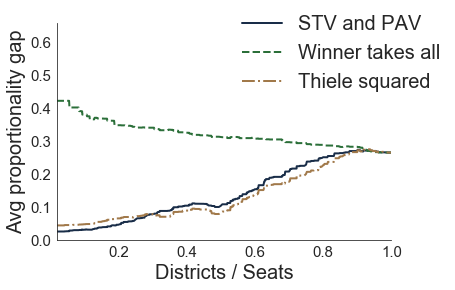

In [33]:
#Proportionality gap by the maximum gerrymanderes
_ = plot_all_state_distribution_generic(
    distributions_gaps_max, prop_val=None, do_vertical_integers=False
    , ymin=0, ymax=.6, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,
    loc="lower left",
)
saveimage('prop_gap_maxgerrymandered', extension = 'pdf')
_ = plot_all_state_distribution_generic(
    distributions_gaps_max, prop_val=None, do_vertical_integers=False
    , ymin=0, ymax=.6, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,#ncols = 2,
    loc="lower left",
)

# Competitiveness

In [108]:
# For each district, wasted votes is just distance to the nearest droop quota threshold
# For each plan (in master dataframe) I just sum across wasted votes in each district.
# and then I think I can use that seat share distribution thing to create the thing that will lead to the line plot

In [155]:
from elections.median_voter import thiele_voting_methods
from elections.thiele_competitiveness_helpers import get_vote_thresholds_for_n_winners
# thiele_voting_methods

In [156]:
methods

['thiele_pav', 'thiele_independent', 'thiele_squared']

In [172]:
method_share_thresholds_all_rules = {met:{} for met in methods}
def get_wasted_votes_per_row(row, rule, rulename):
    vs = row.district_vote_shares
    nwinners = row.district_n_winners
    wasted = 0
    for en, nw in enumerate(nwinners):
        if nw not in method_share_thresholds_all_rules[rulename]:
            method_share_thresholds_all_rules[rulename][nw] = get_vote_thresholds_for_n_winners(rule, nw)
        wasted += min([abs(vs[en] - x) for x in method_share_thresholds_all_rules[rulename][nw]])*nw/row.total_winners
    return wasted

In [173]:
def evalmaybelist(val):
    if type(val) == str:
        return eval(val)
    return val

In [195]:
from functools import partial
def add_wasted_votes_to_df(dft, rule, rulename, do_just_subsampled = False):
    if do_just_subsampled:
        is_subsampled = dft.eval('optimization=="subsampled" or optimization=="single_district_for_state"')
    else:
        t=True
        is_subsampled = dft.eval('optimization=="subsampled" or @t')
    print(rule, sum(is_subsampled))
    dft.loc[is_subsampled,'district_vote_shares'] = dft.loc[is_subsampled,'district_vote_shares'].apply(evalmaybelist)
    dft.loc[is_subsampled,'district_n_winners'] = dft.loc[is_subsampled,'district_n_winners'].apply(evalmaybelist)
    fun = partial(get_wasted_votes_per_row, rule = rule, rulename = rulename)
    dft.loc[is_subsampled,'wasted_votes'] = dft.loc[is_subsampled].apply(fun, axis = 1)
    return dft

In [196]:
# re-orienting it so each line is a method, not min/max/median/most fair
def get_competitiveness_per_method(distribibutions_compet, optimization = 'Median'):
    distributions_gaps = {}
    for state in states:
        d = {'method': [method_names[met] for met in methods_to_plot]}
        for method in methods_to_plot:
            vals = distribibutions_compet[method][state].loc[optimization]
            for i in vals.index:
                d[i] = d.get(i,[]) + [vals[i]]
        distributions_gaps[state] = pd.DataFrame(d).set_index('method')
    return distributions_gaps

In [197]:
# takes about 10-20 minutes or so
dfs['thiele_pav'] = add_wasted_votes_to_df(dfs['thiele_pav'], thiele_pav, rulename = 'thiele_pav')
dfs['thiele_independent'] = add_wasted_votes_to_df(dfs['thiele_independent'], thiele_approvalindependent, rulename = 'thiele_independent')
dfs['thiele_squared'] = add_wasted_votes_to_df(dfs['thiele_squared'], thiele_squared, rulename = 'thiele_squared')

<function thiele_pav at 0x0000023D31469C80> 1819737
<function thiele_approvalindependent at 0x0000023D31469D08> 1819737
<function thiele_squared at 0x0000023D31469D90> 1819737


In [205]:
distributions_compet = {method: state_seat_share_distributions_nikhil(dfs[method]
                               , col = 'wasted_votes'
                                      , divide = False
                                      , col_for_minmaxmostfair = 'N_winners_Republican') for method in methods}
distributions_compet

['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS'
 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'NE' 'NV' 'NH' 'NJ' 'NM'
 'NY' 'NC' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV'
 'WI']
['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS'
 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'NE' 'NV' 'NH' 'NJ' 'NM'
 'NY' 'NC' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV'
 'WI']
['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS'
 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'NE' 'NV' 'NH' 'NJ' 'NM'
 'NY' 'NC' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV'
 'WI']


{'thiele_pav': {'AL':                                 1         2         3         4         5  \
  Most Republican          0.004121  0.063386  0.028074  0.078649  0.034275   
  Median                   0.004121  0.063823  0.049476  0.056821  0.056759   
  Most Fair in each state  0.004121  0.042939  0.063086  0.046093  0.095804   
  Most Democratic          0.004121  0.040506  0.080841  0.023067  0.098475   
  
                                  6         7  
  Most Republican          0.074394  0.121832  
  Median                   0.127997  0.122854  
  Most Fair in each state  0.144422  0.139540  
  Most Democratic          0.144422  0.139540  ,
  'AZ':                                 1         2         3         4         5  \
  Most Republican          0.035548  0.078637  0.035566  0.076381  0.113446   
  Median                   0.035548  0.045428  0.038970  0.093797  0.118629   
  Most Fair in each state  0.035548  0.015591  0.047964  0.047610  0.061174   
  Most Democratic  

limit_output extension: Maximum message size of 10000 exceeded with 90572 characters

In [206]:
distributions_compet['thiele_pav']['AL']

,1,2,3,4,5,6,7
Most Republican,0.004121,0.063386,0.028074,0.078649,0.034275,0.074394,0.121832
Median,0.004121,0.063823,0.049476,0.056821,0.056759,0.127997,0.122854
Most Fair in each state,0.004121,0.042939,0.063086,0.046093,0.095804,0.144422,0.139540
Most Democratic,0.004121,0.040506,0.080841,0.023067,0.098475,0.144422,0.139540


In [207]:
distributions_compet['thiele_independent']['AL']

,1,2,3,4,5,6,7
Most Republican,0.12066,0.120128,0.120105,0.121100,0.121740,0.121136,0.121832
Median,0.12066,0.120631,0.121188,0.122271,0.123513,0.121014,0.122854
Most Fair in each state,0.12066,0.120128,0.122585,0.133397,0.144510,0.132164,0.139540
Most Democratic,0.12066,0.120128,0.122585,0.133397,0.144510,0.132164,0.139540


In [217]:
distributions_compet_methods_median = get_competitiveness_per_method(distributions_compet)
_ = plot_all_state_distribution_generic(
    distributions_compet_methods_median, ymin=0, ymax=.25, xbins=None, legend=False, xlabel="Avg Vote shift needed",
    bbox_to_anchor=(0.5, .6),
    loc="lower left",
)
saveimage('competitiveness_median', extension = 'pdf')

In [218]:
# Most fair 
distributions_compet_methods_mostfair = get_competitiveness_per_method(distributions_compet,optimization= 'Most Fair in each state')
_ = plot_all_state_distribution_generic(
    distributions_compet_methods_mostfair, ymin=0, ymax=.25, xbins=None, legend=False, xlabel="Avg Vote shift needed",
    bbox_to_anchor=(0.5, .6),
    loc="lower left",
)
saveimage('competitiveness_mostfair', extension = 'pdf')

In [219]:
distributions_compet_methods_mostrep = get_competitiveness_per_method(distributions_compet,optimization= 'Most Republican')
_ = plot_all_state_distribution_generic(
    distributions_compet_methods_mostrep, ymin=0, ymax=.25, xbins=None, legend=False, xlabel="Avg Vote shift needed",
    bbox_to_anchor=(0.5, .6),
    loc="lower left",
)
saveimage('competitiveness_mostrep', extension = 'pdf')

In [220]:
distributions_compet_methods_mostdem = get_competitiveness_per_method(distributions_compet,optimization= 'Most Democratic')
_ = plot_all_state_distribution_generic(
    distributions_compet_methods_mostdem, ymin=0, ymax=.25, xbins=None, legend=True, xlabel="Avg Vote shift needed",
    bbox_to_anchor=(0.5, .6),
    loc="lower left",
)
saveimage('competitiveness_mostdem', extension = 'pdf')

# Intra party stuff

## Cohesion

In [43]:
def get_cohesion_df(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}"):
    parties = ['Republican','Democrat']
    party_names = {'Republican':'Republican', 'Democrat':'Democratic'}
    
    distributions_cohesion_party = {}
    for party in parties:
        distributions_cohesion_party[party] = state_seat_share_distributions_nikhil(
            dfstv, col=coltemplate.format(party), do_most_fair=False, divide=False
            , min_name="Least cohesive", max_name="Most cohesive"
        )
        
    # same plot as the methods one, except now cohesion for each party on partisan score
    distributions_partisan_cohesion = {}#{state:{} for method in methods}

    for state in dfstv.state.unique():
        d = {'party': [party_names[party] for party in parties]}
        for party in parties:
            vals =distributions_cohesion_party[party][state].loc['Median']
            for i in vals.index:
                d[i] = d.get(i,[]) + [vals[i]]
        distributions_partisan_cohesion[state] = pd.DataFrame(d).set_index('party')
    return distributions_partisan_cohesion

def plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}"
                  , cohesionlabel = 'Coalition diversity: Partisan'
                  , bbox_to_anchor=(.6,1), ax = None, do_legend = True):
    distributions_partisan_cohesion= get_cohesion_df(dfstv = dfstv, coltemplate = coltemplate)
    _ = plot_all_state_distribution_generic(
        distributions_partisan_cohesion, prop_val=None, do_vertical_integers=False
        , ymin=None, ymax=None, xbins=None, legend=do_legend, xlabel=cohesionlabel, do_zoom = False,
        bbox_to_anchor=bbox_to_anchor,do_broken_axes = False, set_ylim = False, 
        loc="upper left", party_colors = True, ax = ax
    )
    # saveimage('prop_gap', extension = 'pdf')

In [41]:
for party in parties:
    for ddd in [dfs['stv'], dfstvpartisan]:
        for cohesion in ["partisan_score", "education", "income"]:
            print(cohesion, party)
            col = "cohesion_{}_{}".format(cohesion, party)
            ddd.loc[:,col] = (-ddd.loc[:,col]).apply(np.sqrt)
        
        for cohesion in ["geographic"]:
            print(cohesion, party)
            col = "cohesion_{}_{}".format(cohesion, party)
            ddd.loc[:,col] = -ddd.loc[:,col]/1000
# dfs['stv']

partisan_score Republican
education Republican
income Republican
geographic Republican
partisan_score Republican
education Republican
income Republican
geographic Republican
partisan_score Democrat
education Democrat
income Democrat
geographic Democrat
partisan_score Democrat
education Democrat
income Democrat
geographic Democrat


['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']
don't have state, skipping:  WV
['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


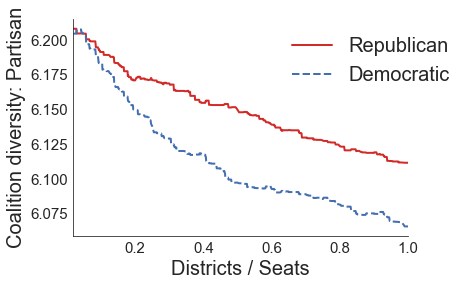

In [44]:
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}")

['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']
don't have state, skipping:  WV
['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


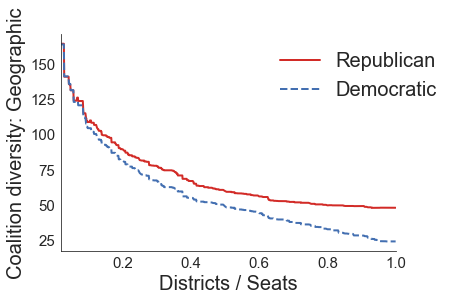

In [45]:
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_geographic_{}", cohesionlabel = 'Coalition diversity: Geographic')

Save plot when ranking second by partisan

In [46]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(1,2, 1)
plot_cohesion(dfstv = dfstvpartisan, coltemplate = "cohesion_partisan_score_{}"
              , ax = ax, cohesionlabel = 'Coalition diversity', do_legend = False)
ax.set_title('Partisan diversity', fontsize = 20)
ax = plt.subplot(1,2, 2)
plot_cohesion(dfstv = dfstvpartisan, coltemplate = "cohesion_geographic_{}"
              , cohesionlabel = 'Coalition diversity (km)', ax = ax)
ax.set_title('Geographic diversity', fontsize = 20)
saveimage('cohesion_whenrankpartisan_both', extension = 'pdf')

['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']
don't have state, skipping:  WV
['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI
['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']
don't have state, skipping:  WV
['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' '

Save plot when ranking by goegraphy

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(1,2, 1)
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}"
              , ax = ax, cohesionlabel = 'Coalition diversity', do_legend = False)
ax.set_title('Partisan diversity', fontsize = 20)
ax = plt.subplot(1,2, 2)
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_geographic_{}"
              , cohesionlabel = 'Coalition diversity (km)', ax = ax)
ax.set_title('Geographic diversity', fontsize = 20)
saveimage('cohesion_whenrankgeog_both', extension = 'pdf')

['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS'
 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM'
 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WI']


## Use medians -- intra-party winner diversity

In [ ]:
def deal_with_medians(df):
    df.loc[:,'medians'] = df.medians.apply(eval)
    return df

def add_intraparty_variances(df):
    def fun_rep (x):
        part = [y for y in x if y <=50]
        if len(part) == 0: return np.nan
        return np.std(part)
    def fun_dem (x):
        part = [y for y in x if y >50]
        if len(part) == 0: return np.nan
        return np.std(part)
    
    df['Republican_variance'] = df.medians.apply(fun_rep)
    df['Democrat_variance'] = df.medians.apply(fun_dem)    
    return df

In [ ]:
dfstvpartisan = deal_with_medians(dfstvpartisan)

In [ ]:
dfstvpartisan = add_intraparty_variances(dfstvpartisan)

In [ ]:
plot_cohesion(dfstv = dfstvpartisan, coltemplate = "{}_variance", bbox_to_anchor=(.6,1)
              , cohesionlabel = 'Intra-Party diversity: Partisan')
saveimage('winnerdiversity_partisan_whenrankpartisan', extension = 'pdf')

In [ ]:
dfs['stv'] = deal_with_medians(dfs['stv'])
dfs['stv'] = add_intraparty_variances(dfs['stv'])

In [ ]:
plot_cohesion(dfstv = dfs['stv'], coltemplate = "{}_variance", bbox_to_anchor=(.4,.8)
             , cohesionlabel = 'Intra-Party diversity: Partisan')
saveimage('winnerdiversity_partisan_whenrankgeo', extension = 'pdf')